Import bibliotek

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

### 1. Użyj funkcji head i describe, aby przeanalizować dane i wyświetlić kilka kolumn.

In [260]:
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [261]:
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [262]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 2. Wyodrębnij dane ze struktury pandas do nowych zmiennych typu ndarray i wykreśl dane, gdzie: x - populacja, y - zysk.

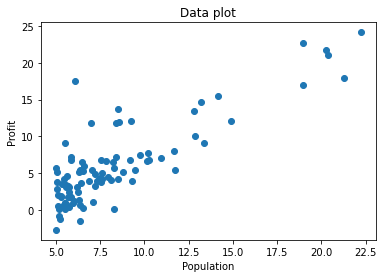

In [263]:
x = data.values[:, 0]   #populacja
y = data.values[:, 1]   #zysk

plt.scatter(x, y)
plt.title("Data plot")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

### 3. Aby funkcja kosztu działała (wartość przecięcia θ0 należy pomnożyć przez 1) musimy wstawić kolumnę jedynek na górze x.

In [264]:
data.insert(2, 'ones', 1)
data

,Population,Profit,ones
0,6.1101,17.59200,1
1,5.5277,9.13020,1
2,8.5186,13.66200,1
3,7.0032,11.85400,1
4,5.8598,6.82330,1
...,...,...,...
92,5.8707,7.20290,1
93,5.3054,1.98690,1
94,8.2934,0.14454,1
95,13.3940,9.05510,1


### 4. Musimy rozdzielić nasze dane na zmienne niezależne X i naszą zmienną zależną y. Musimy również zainicjować parametr θ.

In [265]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)

y.shape = [1, y.shape[0]]

theta = np.zeros((X.shape[0], 1), dtype=np.float32)


### 5. Funkcja kosztu ocenia jakość naszego modelu, obliczając błąd między prognozą naszego modelu dla punktu danych, przy użyciu parametrów modelu, a rzeczywistym punktem danych. Proszę napisać funkcję kosztu na podstawie X,y i parametru θ.

In [266]:
y.shape[1]

97

In [267]:
#hypothesis function
def h(X, theta):
    return theta.T@X

In [268]:
#cost function
def computeCost(x, y, theta):
    return (np.sum((h(X, theta)-y)**2)/(2*y.shape[1]))

### 6. Test funkcji kosztu z (θ=0)

In [269]:
computeCost(X, y, theta)

32.072733877455676

### 7. Proszę zaimplementować algorytm opadania gradientu: funkcja zwraca zoptymalizowane wartości θ oraz wektor wartości funkcji kosztu dla każdej iteracji. Parametry inicjalizacji: 
### alpha = 0.01
### it = 1000

In [270]:
def simple_gradient(X, y, theta, alpha, it):
    m = y.shape[1]
    cost = computeCost(X, y, theta)
    costs_list = [cost]
    min_cost = cost
    theta_opt = theta
    for i in range(it):
        theta[0, 0] = theta[0, 0] - (alpha/m) * np.sum(theta*X - y)   
        theta[1, 0] = theta[1, 0] - (alpha/m) * np.sum((theta*X - y) * X)
        cost = computeCost(X, y, theta)
        costs_list.append(cost)
        if cost < min_cost:
            min_cost = cost
            theta_opt = theta
    theta_opt = theta
    min_cost = cost
    return theta_opt, cost, costs_list


### 8. Proszę obliczyć optymalne parametry dla zbioru danych

In [271]:
alpha = 0.01
it = 1000

theta_min, cost, costs_list = simple_gradient(X, y, theta, alpha, it)
print(theta_min)
print(cost)
print(len(costs_list))

[[5.0501986]
 [0.8122185]]
22.596335288313842
1001


### 9. Proszę obliczyć funkcję kosztu dla danego θ (przykład 8)

In [272]:
computeCost(X, y, theta_min)

22.596335288313842

### 10. Narysuj funkcję regresji i nasz zbiór danych

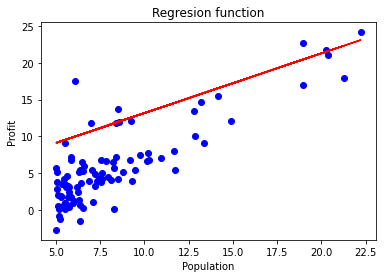

In [273]:
plt.plot("Population", "Profit", "bo", data=data)
x = data['Population']
plt.plot(x, theta[1, 0]*x + theta[0, 0], '-r')
plt.title("Regresion function")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

### 11. Plot the relationship between the cost function and number of iterations.

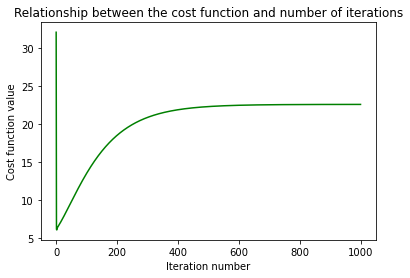

In [274]:
plt.plot(costs_list, "-g")
plt.title("Relationship between the cost function and number of iterations")
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.show()

### Linear regression with multiple variables

In [275]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### EX. 1

In [276]:
normalized = (data2 - data2.mean())/data2.std()
normalized.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Ex. 2

In [277]:
def compute(X, y, theta):
    m = y.shape[1]
    suma = np.sum(np.power(theta*X - y, 2))
    return suma/(2*m)


def gradient_prosty(X, y, theta, alpha, it):
    # it - liczba iteracji
    m = y.shape[1]
    cost = compute(X, y, theta)
    list_of_costs = [cost]
    min_cost = cost
    theta_opt = theta
    for i in range(it):
        theta[0, 0] = theta[0, 0] - (alpha/m) * np.sum(theta*X - y)
        theta[0, 1] = theta[0, 1] - (alpha/m) * np.sum((theta*X - y) * np.transpose(X))
        cost = compute(X, y, theta)
        list_of_costs.append(cost)
        if cost < min_cost:
            min_cost = cost
            theta_opt = theta
    theta = theta_opt
    cost = min_cost
    return theta, cost, list_of_costs


In [278]:
#3
normalized.insert(0, 'ones', 1)
normalized

,ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389
5,1,-0.019732,1.090417,-0.323998
6,1,-0.587240,-0.223675,-0.204036
7,1,-0.721881,-0.223675,-1.130948
8,1,-0.781023,-0.223675,-1.026973
9,1,-0.637573,-0.223675,-0.783051


In [279]:
#4
x = [normalized['ones'], normalized['Size'], normalized['Bedrooms']]
y = data2['Price']

In [280]:
#5
X = np.matrix(x)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0, 0]), dtype=np.float32)

In [281]:
#6
print(compute(X, y, theta))


65591548106.45744


In [288]:
#7 #8
alpha = 0.01
it = 1000

theta, cost, list_of_costs = simple_gradient(X, y, theta, alpha, it)
print(theta)
print(cost)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

Text(0.5, 1.0, 'Linear regression with multiple variables')

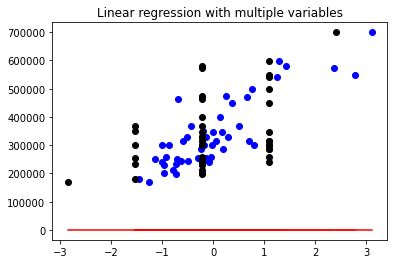

In [286]:

plt.plot(normalized['Size'], data2['Price'], 'bo')
plt.plot(normalized['Bedrooms'], data2['Price'], 'ko')
x = [normalized['Size'], normalized['Bedrooms']]
x = np.matrix(x)
plt.plot(x, theta[0, 1]*x + theta[0, 0], '-r')
plt.title('Linear regression with multiple variables')

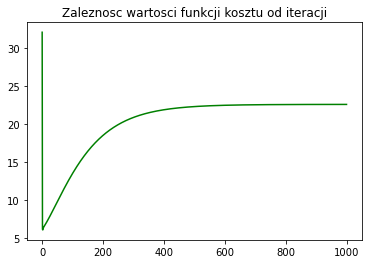

In [287]:
#11 
plt.plot(list_of_costs, '-g')
plt.title('Zaleznosc wartosci funkcji kosztu od iteracji')
plt.show()

### Linear regression - Python packages

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
 
# Data import
 
 
# Normalization
 
 
# Split into train and test sets (70-30%)
 
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))